In [ ]:
%load_ext autoreload
%autoreload 2
from data_gen import DataGen
from utils import *
from model import DeitBat

In [2]:
audio_conf = {'num_mel_bins': 128,
              'mean': -1.6896871,
              'std': 2.7739134,
              # 'window_size': 0.23,  # ms TE
              'fft_overlap': 0.845,
              'fft_win_length': 0.02322,  # ms TE
              'window_width': 64,  # 0.23 ms TE
              'slide_window_stride': 2,
              }

In [3]:
datagen = DataGen(["data/Eptesicus_nilssonii_Ski0113_S2_From0439521ms_To0482724ms.wav"],
                  raw_audio_dir='.',
                  audio_conf=audio_conf)

datagen = torch.utils.data.DataLoader(
    datagen, batch_size=1, shuffle=False, num_workers=8, pin_memory=False)

In [4]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

det_model = DeitBat(model_size='tiny224',fstride=10, tstride=10, input_fdim=128, input_tdim=audio_conf['window_width'])

if torch.cuda.is_available():
    det_model.load_state_dict(torch.load("models/skiba_det_model.pth"))
else:
    det_model.load_state_dict(torch.load("models/skiba_det_model.pth", map_location=torch.device('cpu')))

frequncey stride=10, time stride=10
number of patches=60


In [5]:
for (inputs, duration, spec_width, filename) in datagen:
    det_time, det_prob, preds = run_model(det_model,
                                          inputs[0],
                                          file_duration=duration[0].numpy(),
                                          detection_thresh=0.95,
                                          spec_width=spec_width,
                                          scale_factor=audio_conf["slide_window_stride"],
                                          nms_win_size=33,
                                          local_batch_size=64)

    print({"det_time": det_time, "det_prob": det_prob})

{'det_time': tensor([ 0.5177,  2.5312,  3.8471,  6.2273,  7.4641,  8.7801, 10.2974, 12.2677,
        13.5261, 15.5036, 16.5606, 17.6896, 18.9048, 20.7889, 22.0185, 23.1762,
        24.5137, 25.7362, 27.7784, 28.3033, 30.3456, 32.3734, 33.6821, 36.0551,
        37.2920, 38.6079, 40.1252, 42.0883], dtype=torch.float64), 'det_prob': array([0.99986482, 0.99988949, 0.99987876, 0.99986553, 0.99988663,
       0.99987745, 0.99985778, 0.99983704, 0.99986172, 0.99984312,
       0.99985909, 0.99983275, 0.9998548 , 0.99987352, 0.99987209,
       0.99986327, 0.99977189, 0.9998734 , 0.99984539, 0.99987793,
       0.99986124, 0.99987566, 0.99987805, 0.99986756, 0.99990129,
       0.99987197, 0.99984753, 0.99983954])}


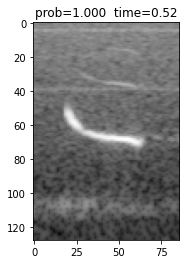

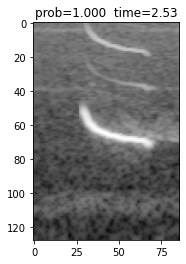

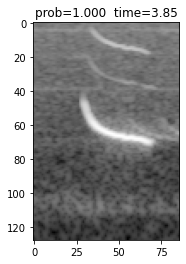

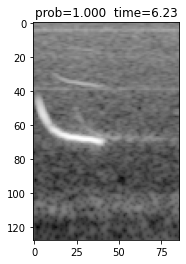

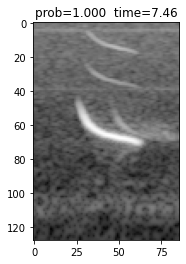

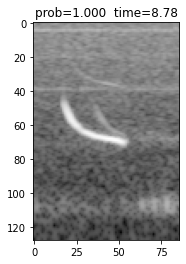

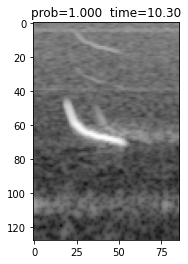

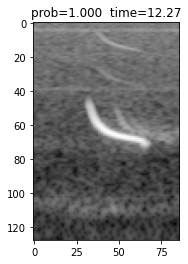

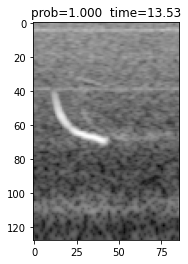

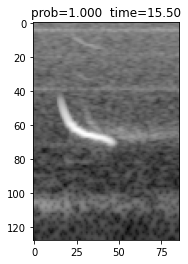

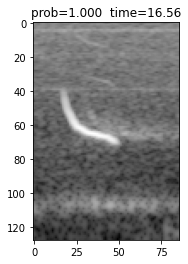

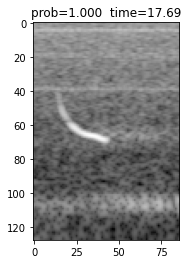

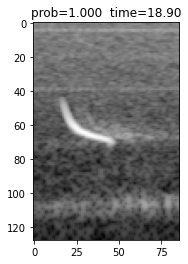

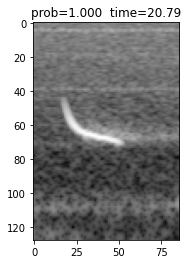

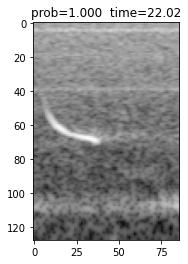

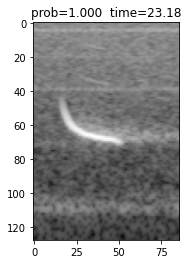

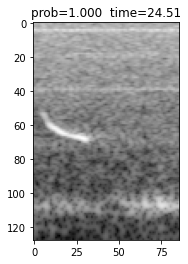

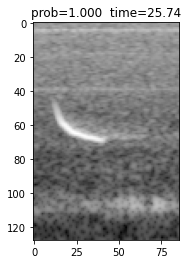

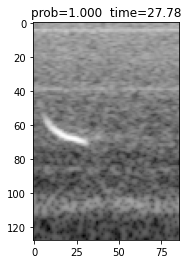

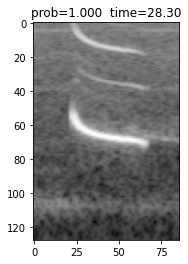

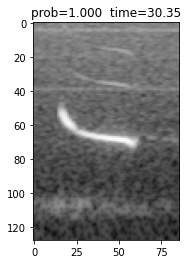

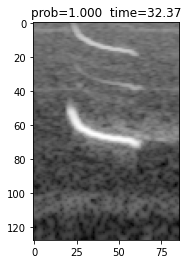

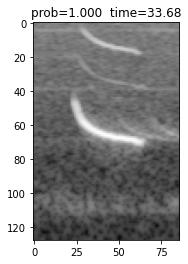

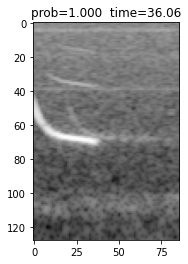

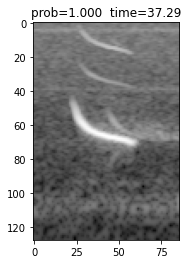

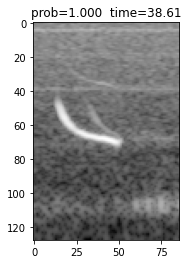

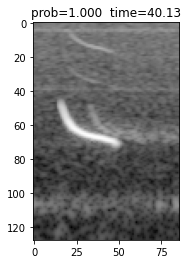

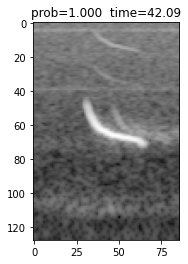

[array([[ -4.235751 ,  -3.9909408,  -3.925662 , ...,  -4.6926565,
          -4.875368 ,  -4.4430823],
        [ -4.977312 ,  -4.486868 ,  -4.4273167, ...,  -4.891934 ,
          -5.1636734,  -5.185881 ],
        [ -4.9656343,  -4.225832 ,  -3.7421775, ...,  -4.1989827,
          -4.2569923,  -4.508919 ],
        ...,
        [-10.5810375, -10.381223 , -10.586065 , ...,  -9.844379 ,
          -9.704664 , -10.4473715],
        [ -9.976266 ,  -9.983323 , -10.610668 , ..., -10.48966  ,
          -9.8428335,  -9.784489 ],
        [ -9.687198 ,  -9.970182 , -11.374822 , ..., -11.367931 ,
         -10.698597 ,  -9.638583 ]], dtype=float32),
 array([[ -4.2250333,  -4.2208996,  -3.7700212, ...,  -3.284066 ,
          -3.6637936,  -4.3254056],
        [ -4.2665505,  -4.201777 ,  -4.2595944, ...,  -3.311746 ,
          -3.4266727,  -3.2982607],
        [ -4.194539 ,  -4.800665 ,  -4.495199 , ...,  -3.9751554,
          -3.393694 ,  -3.1738033],
        ...,
        [ -8.587872 ,  -8.474606 ,  -8.

In [6]:
visualize_calls("data/Eptesicus_nilssonii_Ski0113_S2_From0439521ms_To0482724ms.wav",
                {"det_time": det_time, "det_prob": det_prob},
                audio_conf)